# Lab 7-2: MNIST Introdution

## Imports

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [3]:
#parameters
training_epochs = 20
batch_size = 100

## Data


In [4]:
#MNIST Dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train= True,
                          transform= transforms.ToTensor(),
                          download= True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                          train= False,
                          transform= transforms.ToTensor(),
                          download= True)

In [5]:
#dataset loader
dataLoader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle= True,
                                         drop_last=True)

## Model & Training

In [6]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias= True).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) #?
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
# Training
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(dataLoader)

  for X, Y in dataLoader:
    #reshape input image into [batch_size by 284]
    #label is not one-hot encoded
    X = X.view(-1, 28 * 28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
  print('Epoch: {:4d} Cost= {:.9f}'.format(epoch + 1, avg_cost))

Epoch:    1 Cost= 0.535150588
Epoch:    2 Cost= 0.359577745
Epoch:    3 Cost= 0.331264287
Epoch:    4 Cost= 0.316404700
Epoch:    5 Cost= 0.307106972
Epoch:    6 Cost= 0.300456524
Epoch:    7 Cost= 0.294933408
Epoch:    8 Cost= 0.290956199
Epoch:    9 Cost= 0.287074089
Epoch:   10 Cost= 0.284515589
Epoch:   11 Cost= 0.281914085
Epoch:   12 Cost= 0.279526889
Epoch:   13 Cost= 0.277636588
Epoch:   14 Cost= 0.275874794
Epoch:   15 Cost= 0.274422735
Epoch:   16 Cost= 0.272883683
Epoch:   17 Cost= 0.271629602
Epoch:   18 Cost= 0.270609766
Epoch:   19 Cost= 0.269295007
Epoch:   20 Cost= 0.268277347


## Testing and Visualizing

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.8766999840736389
Label: 8
Prediction: 3


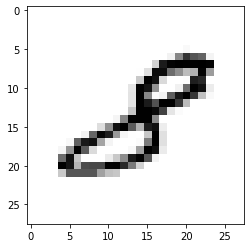

In [10]:
with torch.no_grad():
  #testing
  X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_count = (prediction.argmax(1) == Y_test)
  accuracy = correct_count.float().mean()
  
  print('Accuracy:', accuracy.item())

# visualize
with torch.no_grad():
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label:', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction:', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap="Greys", interpolation='nearest')
  plt.show